In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from detection import *
from tqdm import tqdm
import pandas as pd


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [6]:
E = np.linspace(1.804, 100, 1000000) # Neutrino detection energy
detector = 'super-k'
resolution = 0.05 # Fraction of error in energy reconstruction
distance = 10000

In [20]:
ref = energy_sampler(E, 2e53, resolution, 'proportional', detector, 'normal', distance)
ref_invert = energy_sampler(E, 2e53, resolution, 'proportional', detector, 'inverted', distance)

Number of expected neutrinos by flavor at 10000 parsecs

electron neutrinos: 150
electron antineutrinos: 3238
mu/tau (anti)neutrinos: 16
Number of expected neutrinos by flavor at 10000 parsecs

electron neutrinos: 146
electron antineutrinos: 3318
mu/tau (anti)neutrinos: 16


In [30]:
len(ref['nu_x'])

14

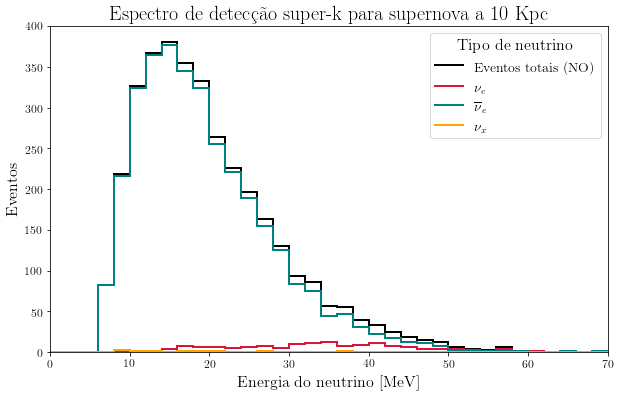

In [26]:
fig = plt.figure(figsize=(10,6))
plt.hist(ref['Total'], bins = [2*i for i in range(50)], histtype = 'step', color = 'black',
        lw = 2)
plt.plot([80, 100], [0,10], label = r'Eventos totais (NO)', color = 'black', lw = 2)
# plt.hist(ref_invert['Total'], bins = [2*i for i in range(50)], histtype = 'step', color = 'black',
#         lw = 2, label = r'$\nu_e + \overline{\nu}_e + \nu_x$ (IO)', ls = '--')
plt.hist(ref['nu_e'], bins = [2*i for i in range(50)], histtype = 'step', color = 'crimson',
        lw = 2)
plt.plot([80, 100], [0,10], label = r'$\nu_e$', color = 'crimson', lw = 2)
plt.hist(ref['nubar_e'], bins = [2*i for i in range(50)], histtype = 'step', color = 'teal',
        lw = 2)
plt.plot([80, 100], [0,10], label = r'$\overline{\nu}_e$', color = 'teal', lw = 2)
plt.hist(ref['nu_x'], bins = [2*i for i in range(50)], histtype = 'step', color = 'orange',
        lw = 2)
plt.plot([80, 100], [0,10], label = r'$\nu_x$', color = 'orange', lw = 2)
lgd = plt.legend(title = 'Tipo de neutrino', loc = 'upper right', fontsize = 14)
title = lgd.get_title()
title.set_fontsize(16)
plt.xlabel('Energia do neutrino [MeV]', fontsize = 16)
plt.ylabel('Eventos', fontsize = 16)
plt.title(f'Espectro de detecção {detector} para supernova a {int(distance/1000)} Kpc', fontsize = 20)
plt.xlim(0, 70)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.patch.set_alpha(0.4)
plt.savefig(f'/home/pedroc/Documentos/pedro/Mestradives/Simulations/Supernova-neutrinos/detection_spectrum_{detector}_{int(distance/1000)}_kpc_normal_ordering_pt-br.svg',
            bbox_inches = 'tight', dpi = 300)
plt.show()

In [5]:
results = {}
distances = []
means_no = []
means_io = []
std_no = []
std_io = []
for i in tqdm(range(20)):
    distance = 5000 + 2000*i
    tot_no = []
    tot_io = []
    for j in range(20):
        ref = energy_sampler(E, 2e53, resolution, 'proportional', detector, 'normal', distance, print_expected=False, only_total_events=True)
        ref_invert = energy_sampler(E, 2e53, resolution, 'proportional', detector, 'inverted', distance, print_expected=False, only_total_events=True)
        tot_no.append(ref['Total'])
        tot_io.append(ref_invert['Total'])
    distances.append(distance)
    means_no.append(np.mean(tot_no))
    means_io.append(np.mean(tot_io))
    std_no.append(np.std(tot_no))
    std_io.append(np.std(tot_io))

100%|██████████| 20/20 [1:30:08<00:00, 270.45s/it]


In [6]:
distances = np.array(distances)
means_no = np.array(means_no)
means_io = np.array(means_io)
std_no = np.array(std_no)
std_io = np.array(std_io)

In [7]:
results['Distances'] = distances
results['Mean N normal'] = means_no
results['Mean N inverted'] = means_io
results['SD N normal'] = std_no
results['SD N inverted'] = std_io

In [8]:
pd.DataFrame(results).to_csv(f'Total_events_detected_{detector}.csv')

\begin{align}
N_\nu \propto \frac{1}{D^2}
\end{align}

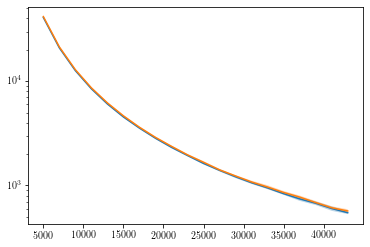

In [21]:
plt.plot(distances, means_no)
plt.fill_between(distances, means_no-std_no, means_no+std_no, alpha = 0.3)
plt.plot(distances, means_io)
plt.fill_between(distances, means_io-std_io, means_io+std_io, alpha = 0.3)
plt.yscale('log')
# plt.xlim(5000, 10000)
plt.show()